In [31]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

debug = 1 #set to 1 to see each step set to 0 to run fast
cursed = 0 #a weird bug i wanted to show to a freind dont ever set to 1 (ill delet this once ive shown them)

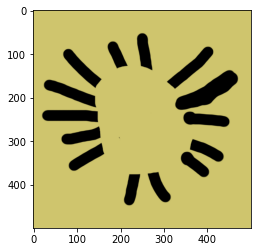

In [54]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
diceRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
diceRaw = cv2.cvtColor(diceRaw,cv2.COLOR_RGB2BGR)
if debug == 1:
    plt.imshow(diceRaw)

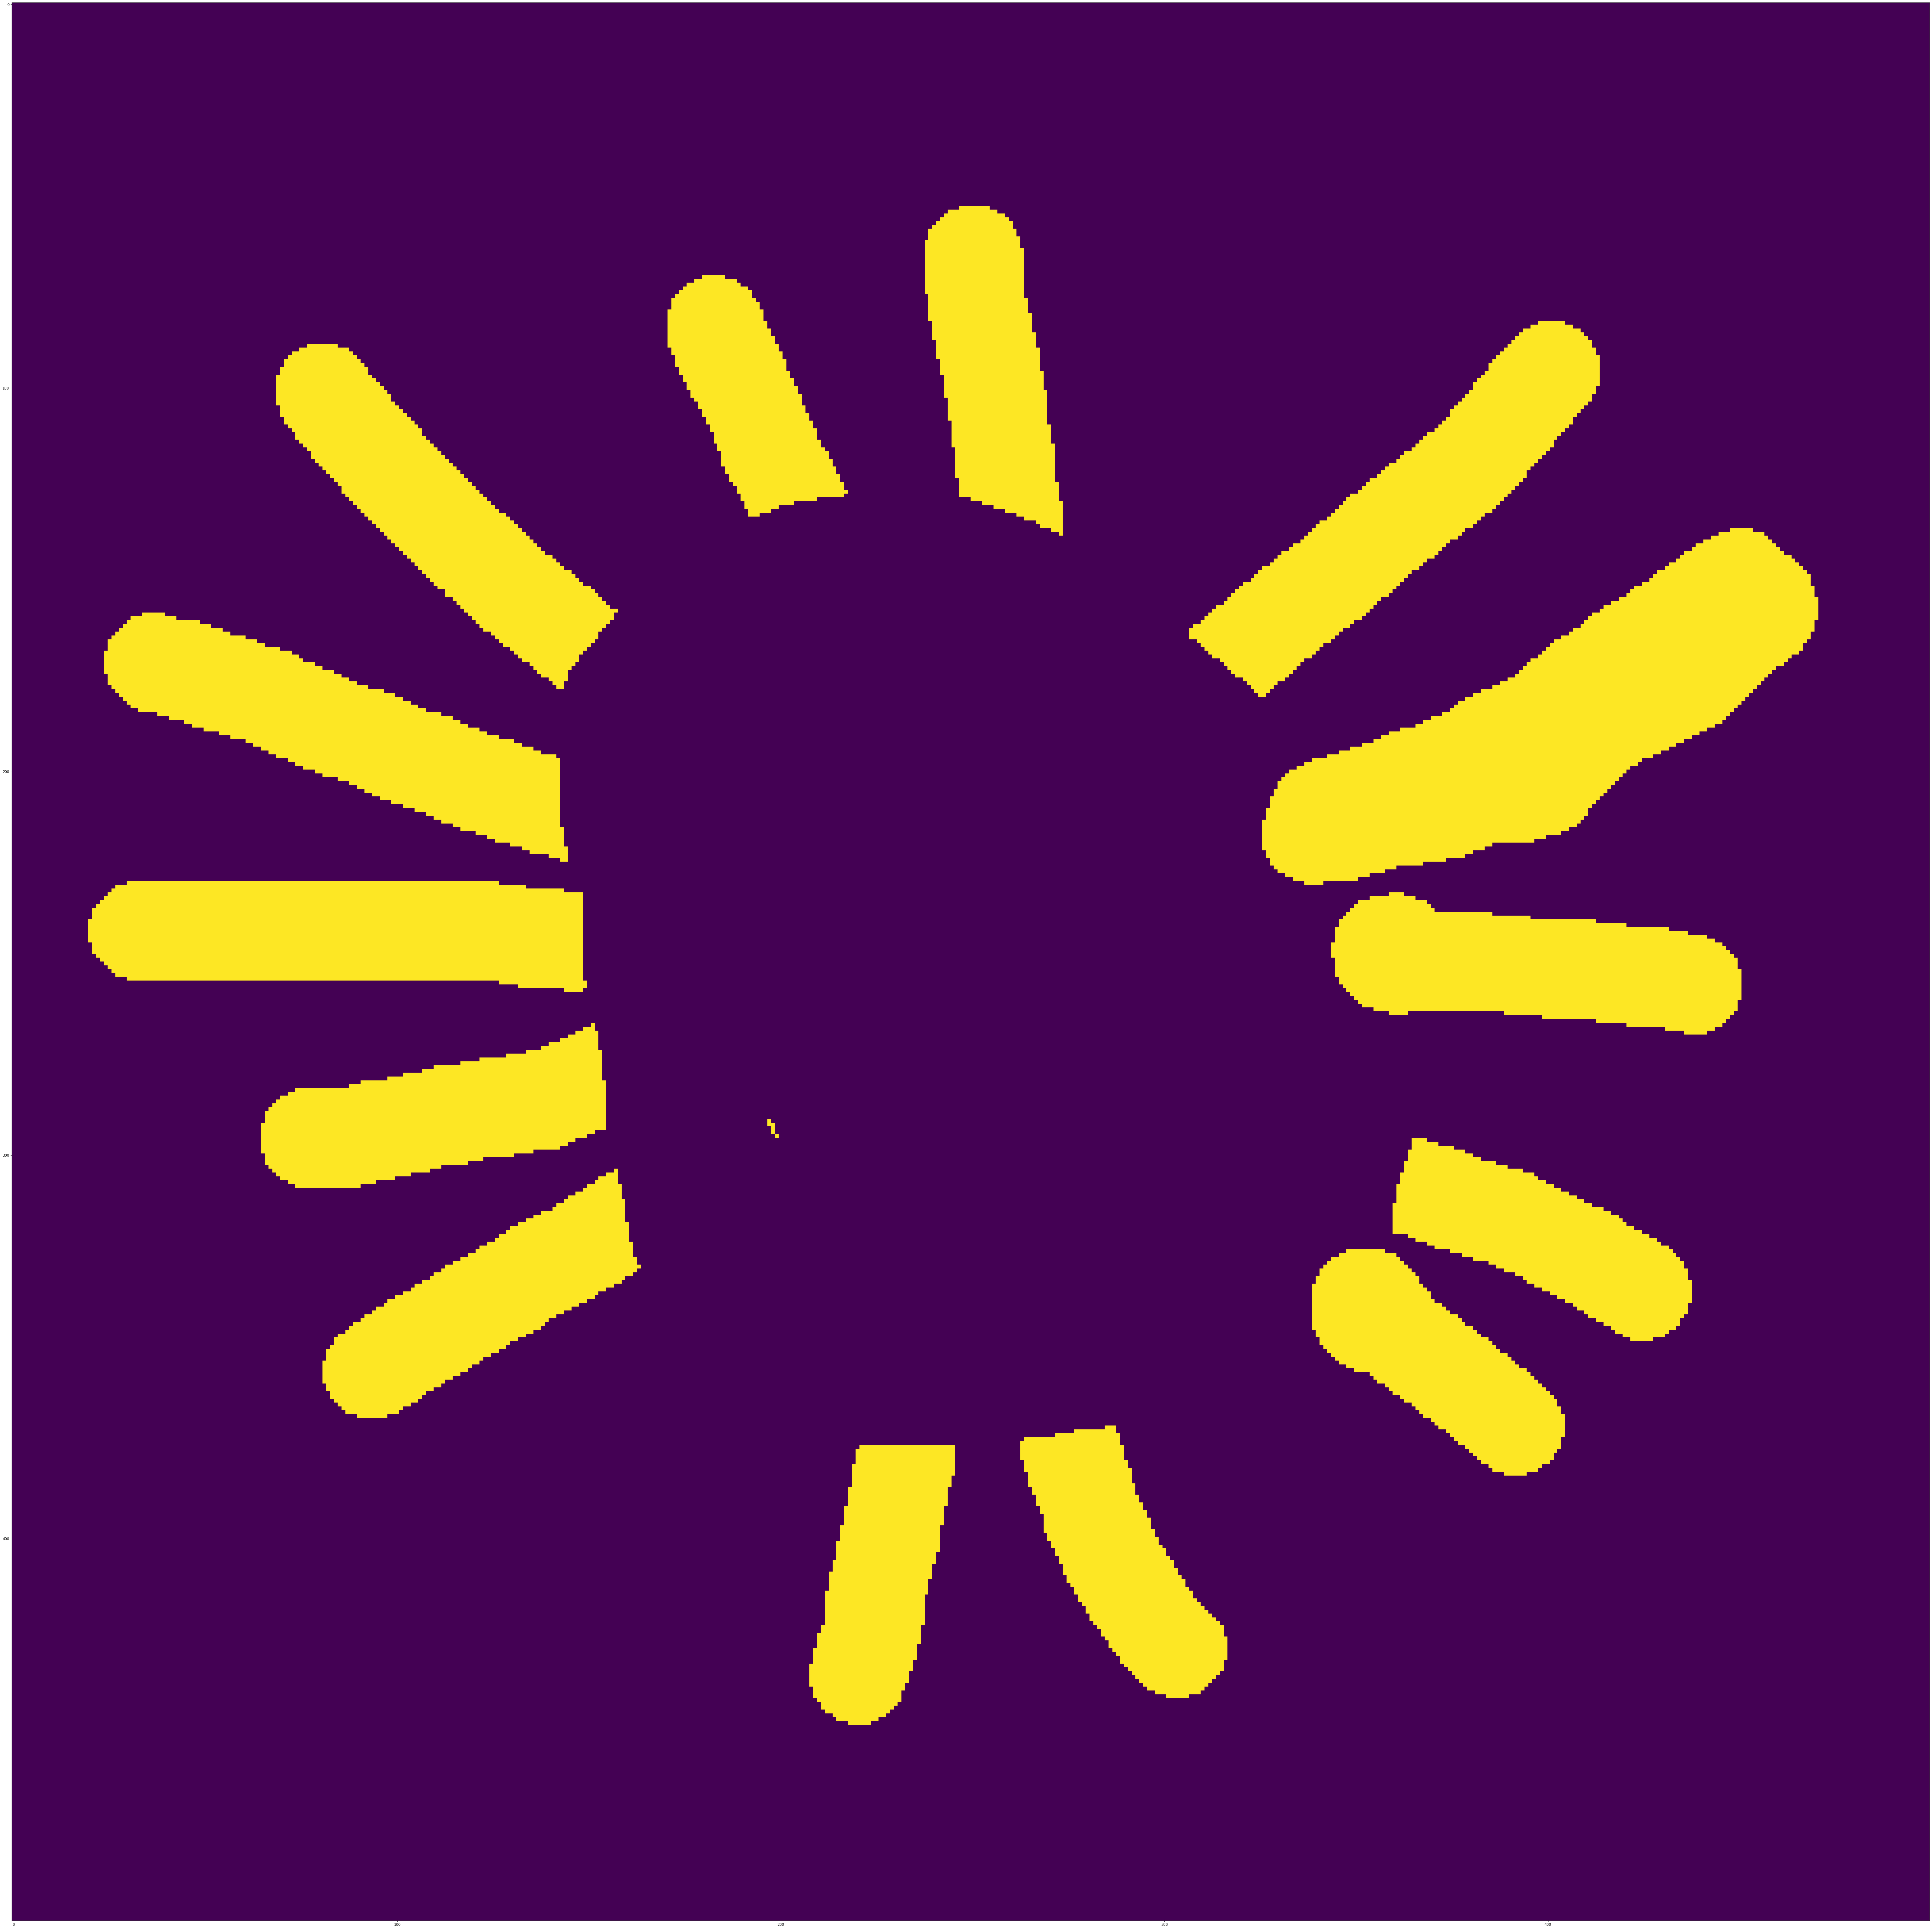

In [55]:
Gray = cv2.cvtColor(diceRaw,cv2.COLOR_BGR2GRAY)
Gray = (255-Gray)
(T, Gray) = cv2.threshold(Gray,100, 255, cv2.THRESH_BINARY)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(Gray)


In [56]:
contours, hierarchy = cv2.findContours(Gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(hierarchy[0]))
rows,cols = diceRaw.shape[:2]

for i in range(len(hierarchy[0])):
    [vx,vy,x,y] = cv2.fitLine(contours[i], cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-x*vy/vx) + y)
    righty = int(((cols-x)*vy/vx)+y)
    cv2.line(diceRaw,(cols-1,righty),(0,lefty),(255*i/len(hierarchy[0]),255*i/len(hierarchy[0]),255*i/len(hierarchy[0])),2)
    print("vx:",vx,"vy:",vy,"x:",x,"y:",y,"colour",255*i/len(hierarchy[0]))

15
vx: [0.21712695] vy: [-0.97614336] x: [224.85916] y: [416.84506] colour 0.0
vx: [0.4780551] vy: [0.8783299] x: [286.66315] y: [402.66315] colour 17.0
vx: [0.78483695] vy: [0.6197023] x: [370.7361] y: [354.95834] colour 34.0
vx: [0.85450494] vy: [-0.5194432] x: [124.9037] y: [336.74075] colour 51.0
vx: [0.8913088] vy: [0.45339677] x: [398.5242] y: [321.7742] colour 68.0
vx: [0.40325597] vy: [0.9150872] x: [197.85715] y: [293.] colour 85.0
vx: [0.97115725] vy: [-0.23843998] x: [115.94253] y: [287.47125] colour 102.0
vx: [0.99334764] vy: [0.1151542] x: [396.89706] y: [250.27942] colour 119.0
vx: [0.9992464] vy: [0.0388143] x: [91.31035] y: [243.72414] colour 136.0
vx: [0.9248626] vy: [0.38030133] x: [87.98225] y: [190.57988] colour 153.0
vx: [0.88988656] vy: [-0.45618194] x: [394.73596] y: [187.36517] colour 170.0
vx: [0.704299] vy: [0.7099035] x: [110.515625] y: [133.10938] colour 187.0
vx: [0.750185] vy: [-0.661228] x: [364.16092] y: [129.63219] colour 204.0
vx: [0.40849203] vy: [0.9

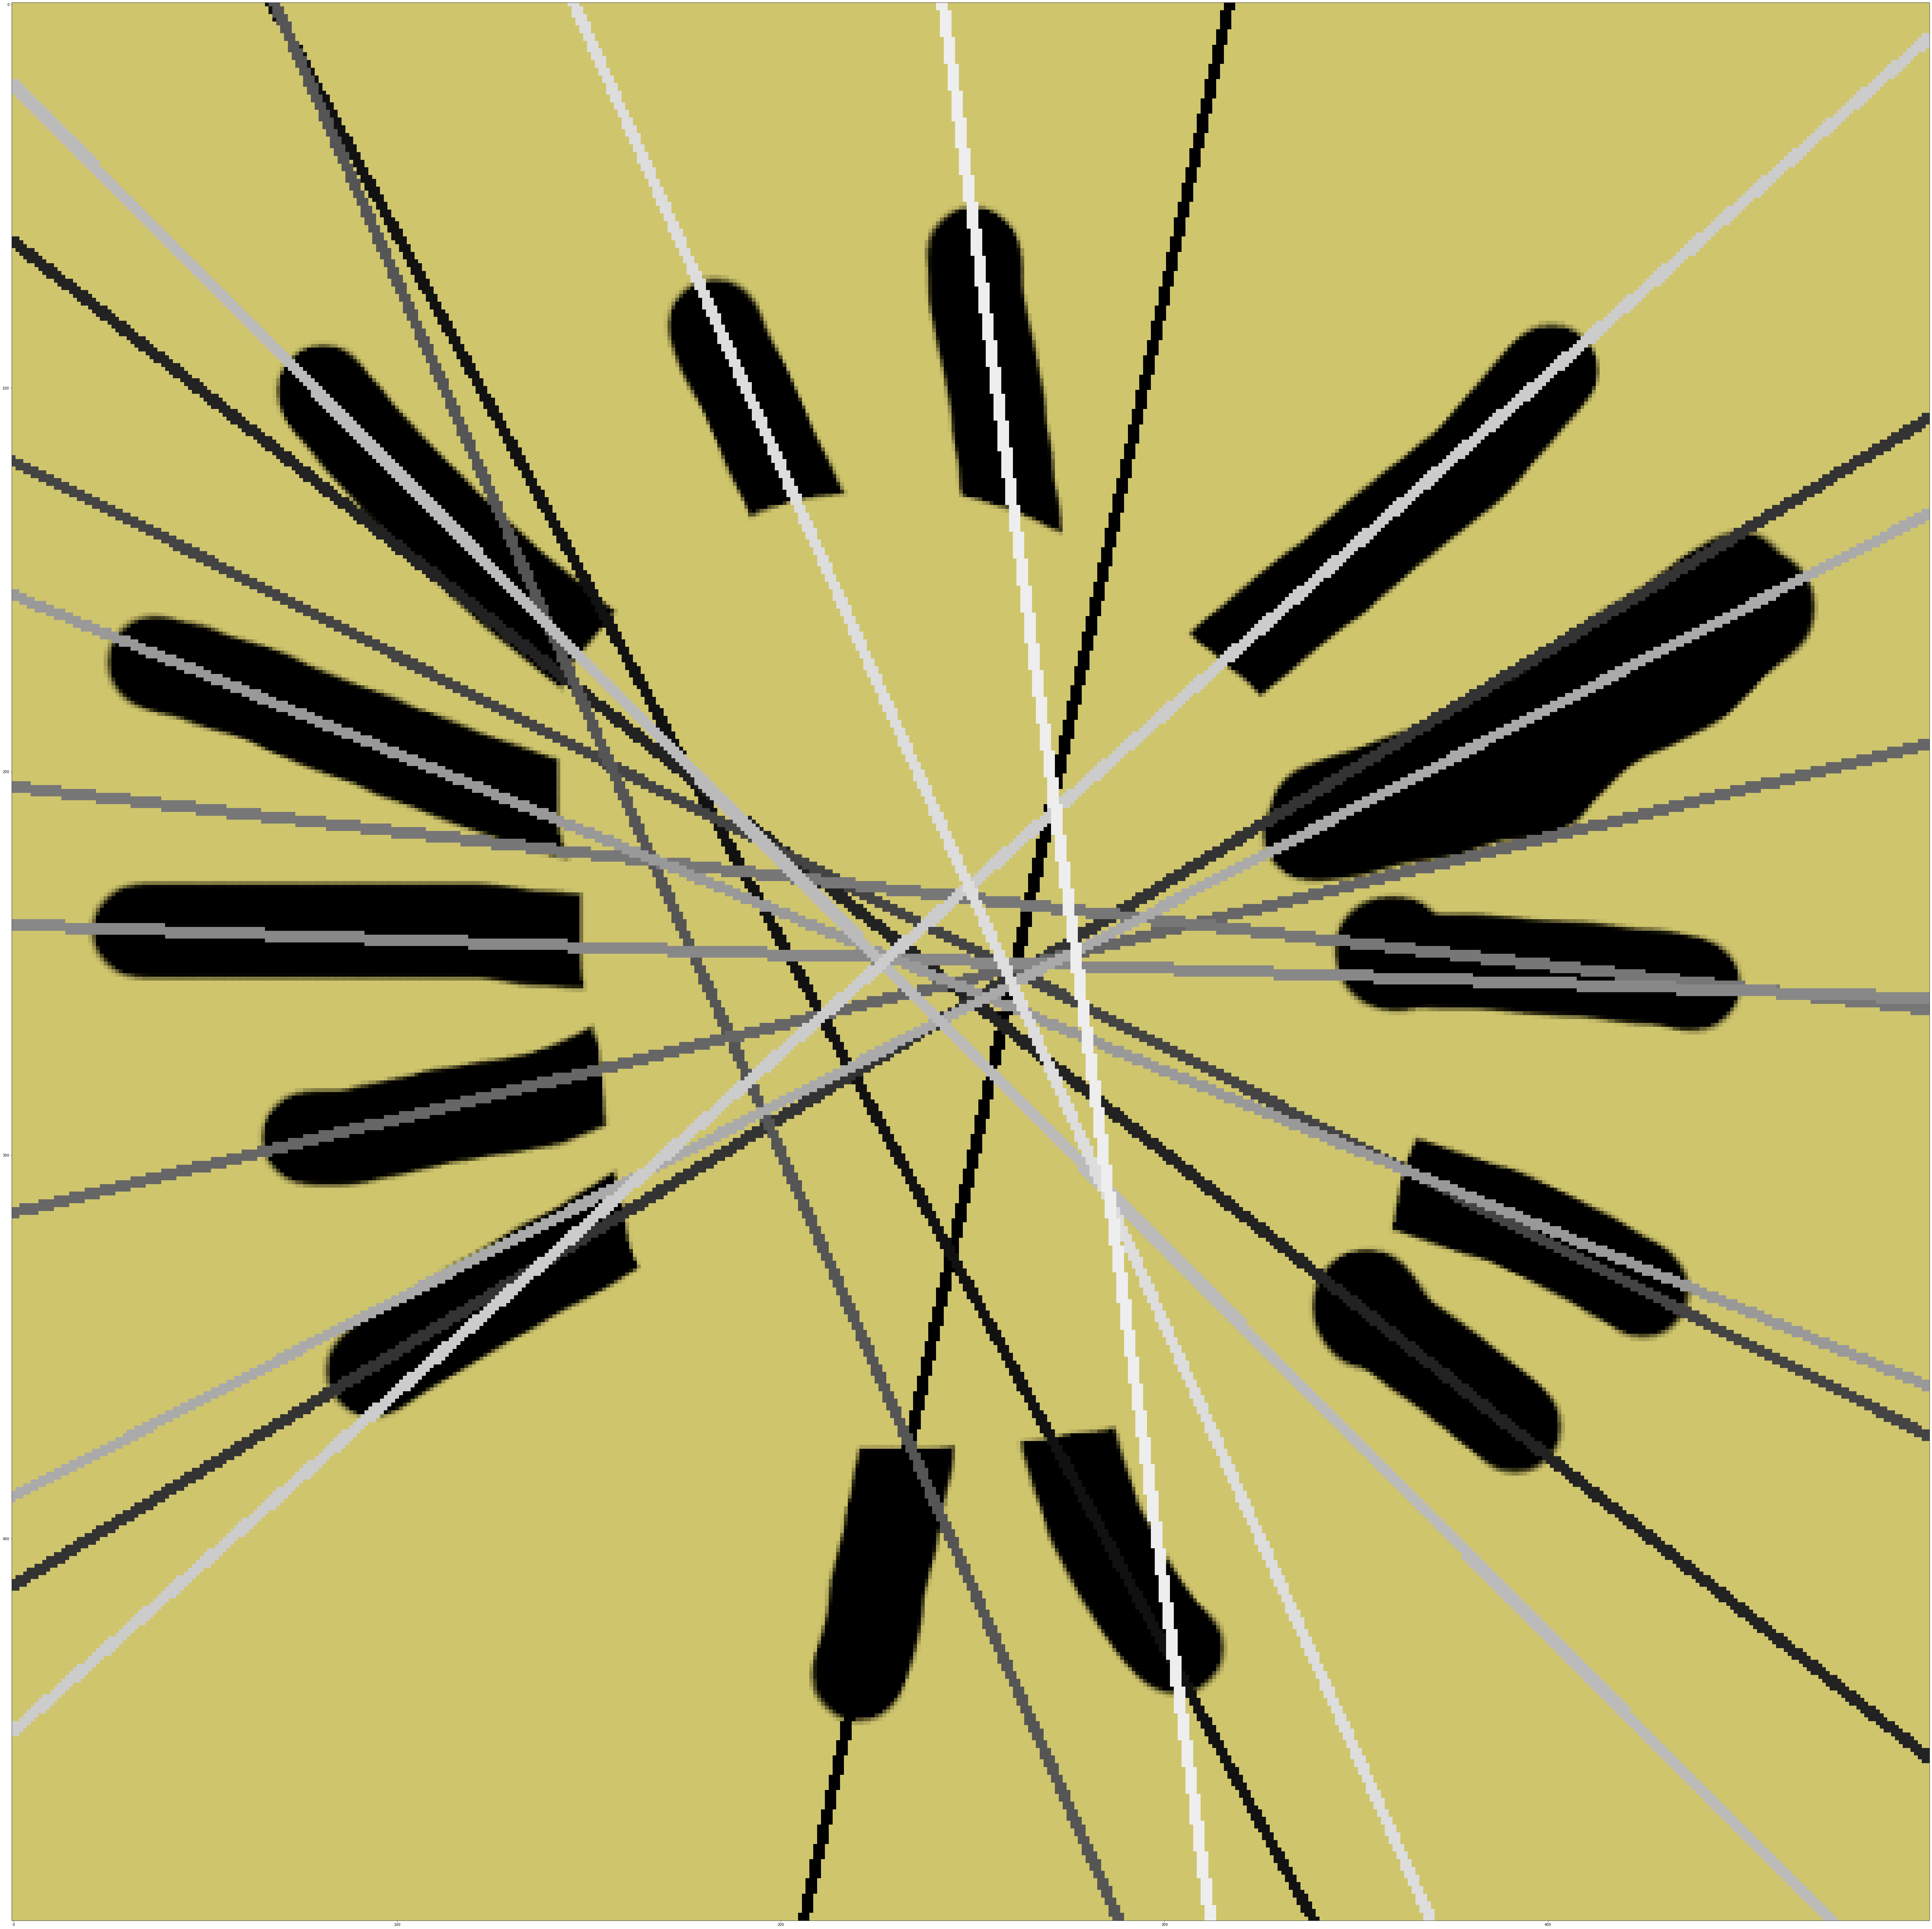

In [58]:
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceRaw)

In [62]:
179%90

89